<a href="https://colab.research.google.com/github/KrisMatrix/DataScience_Datasets/blob/main/Where_it_Pays_to_Attend_College.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Where it Pays to Attend College

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
deg_pay = pd.read_csv("https://raw.githubusercontent.com/KrisMatrix/DataScience_Datasets/main/Where_it_pays_to_go_to_college/degrees-that-pay-back.csv")
col_pay = pd.read_csv("https://raw.githubusercontent.com/KrisMatrix/DataScience_Datasets/main/Where_it_pays_to_go_to_college/salaries-by-college-type.csv")
region_pay = pd.read_csv("https://raw.githubusercontent.com/KrisMatrix/DataScience_Datasets/main/Where_it_pays_to_go_to_college/salaries-by-region.csv")

Let's take a look at the data in each of these data frames.

In [3]:
deg_pay.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [4]:
col_pay.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [5]:
region_pay.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


Let's work with the degree datasets for now.

Let's draw a bar graph (vertical or horizontal) that maps degree vs salary data

In [18]:
def plot_bar(x, y, title, xlabel, ylabel, height=0.5, figsize=(5,5)):
  #print(figsize)
  fig, ax = plt.subplots(1,1, figsize=figsize)
  ax.barh(x, y, color='Red', height=0.5, align='center')
  ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
  plt.xticks(rotation=45)
  plt.show()

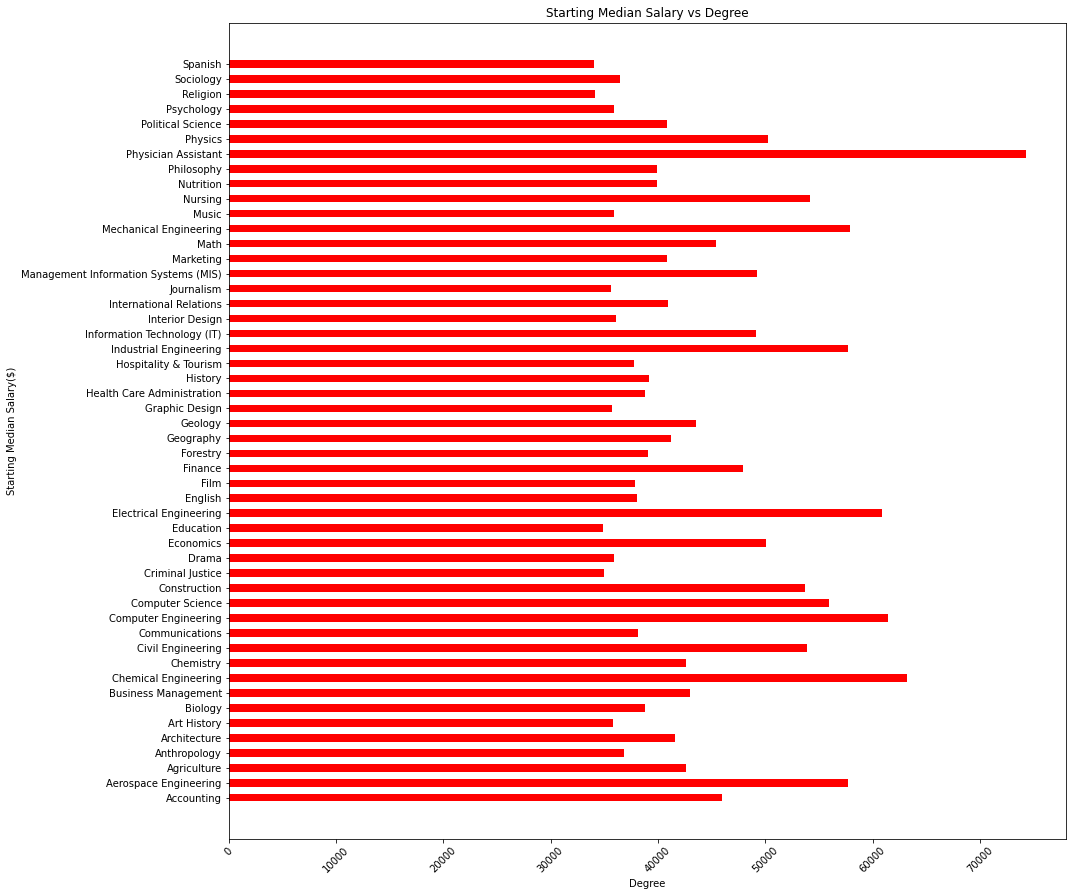

In [8]:
import re
degrees = deg_pay['Undergraduate Major'].tolist()

starting_median_salary = deg_pay['Starting Median Salary'].tolist()

# The price data is a string format. We want to convert it to int,
# so we remove $ and , from string. Then convert to float and then to int
# to truncate the decimal.
for i in range(len(starting_median_salary)):
  starting_median_salary[i] = re.sub(r'[\$,]',r'',starting_median_salary[i])
  starting_median_salary[i] = int(float(starting_median_salary[i]))

plot_bar(degrees, starting_median_salary, title="Starting Median Salary vs Degree", xlabel = "Degree", ylabel = "Starting Median Salary($)", figsize=(15,15))

The above plot is useful, but a little ugly to analyze. Lets sort these so that we can analyze this more easily.

In [9]:
print(starting_median_salary)
indices = [i[0] for i in sorted(enumerate(starting_median_salary), key=lambda x:x[1])]
print(indices)
starting_median_salary = [starting_median_salary[i] for i in indices]
degrees = [degrees[i] for i in indices]

[46000, 57700, 42600, 36800, 41600, 35800, 38800, 43000, 63200, 42600, 53900, 38100, 61400, 55900, 53700, 35000, 35900, 50100, 34900, 60900, 38000, 37900, 47900, 39100, 41200, 43500, 35700, 38800, 39200, 37800, 57700, 49100, 36100, 40900, 35600, 49200, 40800, 45400, 57900, 35900, 54200, 39900, 39900, 74300, 50300, 40800, 35900, 34100, 36500, 34000]
[49, 47, 18, 15, 34, 26, 5, 16, 39, 46, 32, 48, 3, 29, 21, 20, 11, 6, 27, 23, 28, 41, 42, 36, 45, 33, 24, 4, 2, 9, 7, 25, 37, 0, 22, 31, 35, 17, 44, 14, 10, 40, 13, 1, 30, 38, 19, 12, 8, 43]


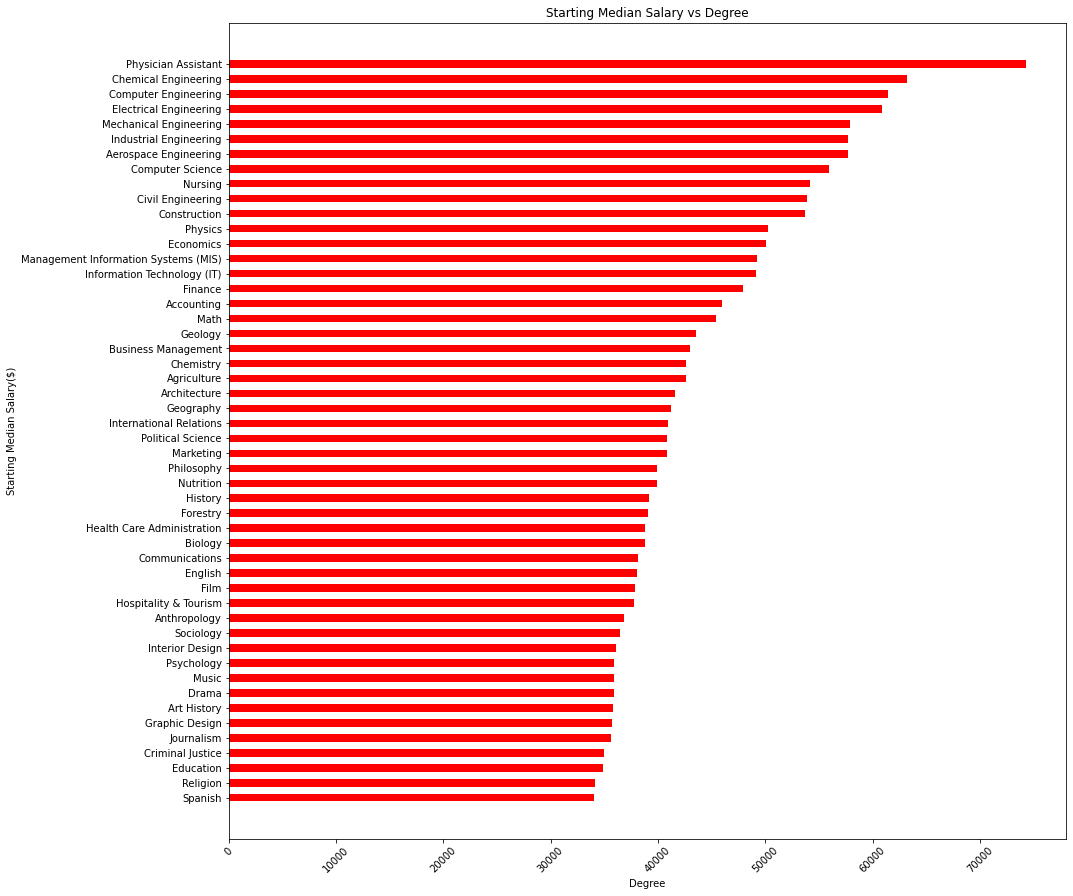

In [10]:
plot_bar(degrees, starting_median_salary, title="Starting Median Salary vs Degree", xlabel = "Degree", ylabel = "Starting Median Salary($)", figsize=(15,15))

Nice!

From this data, we see that the degrees with:

* the lowest paying starting salaries include Spanish, Religion, Education, Criminal Justice and Journalism.
* the highest paying starting salaries include Physician Assistant, Various Engineering fields, Computer Science, and Nursing.

In [11]:
deg_pay.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


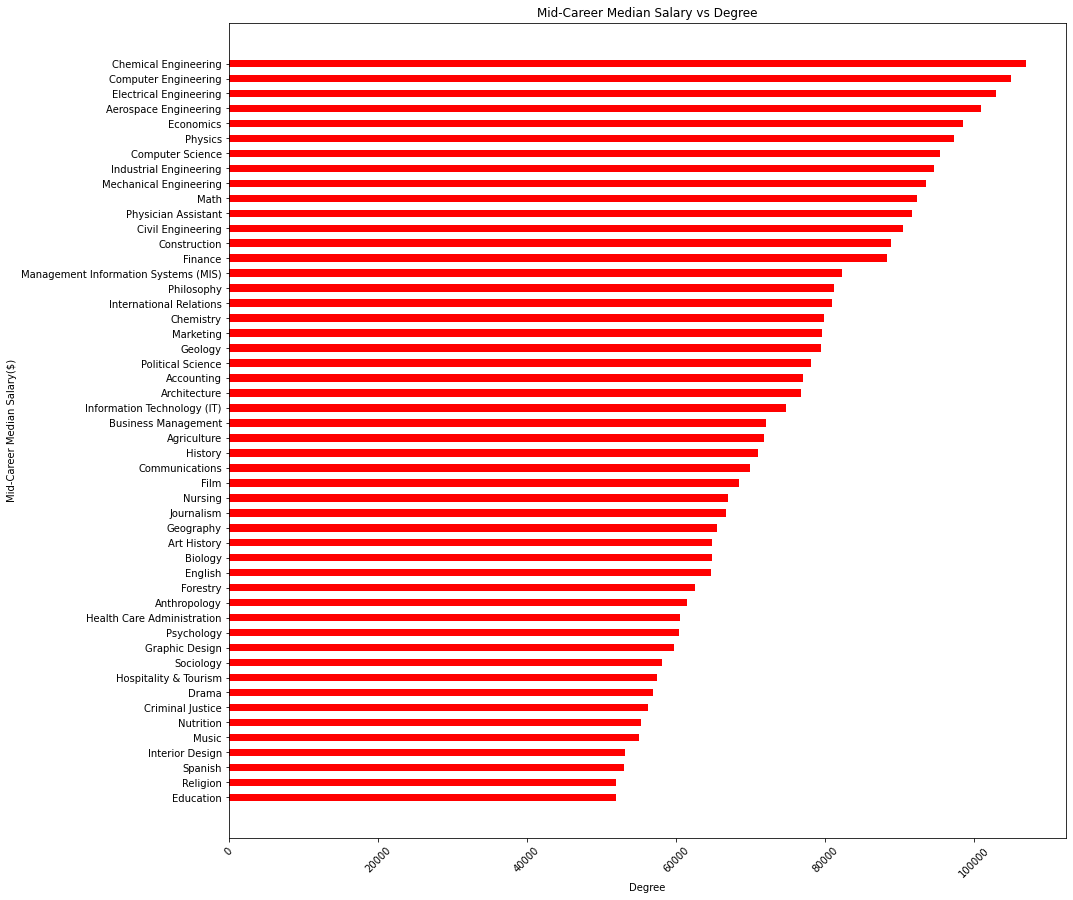

In [12]:
import re
degrees = deg_pay['Undergraduate Major'].tolist()

midcareer_median_salary = deg_pay['Mid-Career Median Salary'].tolist()

# The price data is a string format. We want to convert it to int,
# so we remove $ and , from string. Then convert to float and then to int
# to truncate the decimal.
for i in range(len(midcareer_median_salary)):
  midcareer_median_salary[i] = re.sub(r'[\$,]',r'',midcareer_median_salary[i])
  midcareer_median_salary[i] = int(float(midcareer_median_salary[i]))

# Let's sort the degrees and midcareer_median_salary data so that they are
# both sorted according to the midcareer_median_salary data..
indices = [i[0] for i in sorted(enumerate(midcareer_median_salary), key=lambda x:x[1])]
midcareer_median_salary = [midcareer_median_salary[i] for i in indices]
degrees = [degrees[i] for i in indices]

plot_bar(degrees, midcareer_median_salary, title="Mid-Career Median Salary vs Degree", xlabel = "Degree", ylabel = "Mid-Career Median Salary($)", figsize=(15,15))

We observe some interesting changes. 

1. The salaries of engineers shoot up significantly. (*Since i am an engineer, this is nice to see..*
2. The Physician Assistant salary doesn't improve at a comparable rate.

I realzied that the dataset doesn't show the legal profession nor the medical doctor professions. 

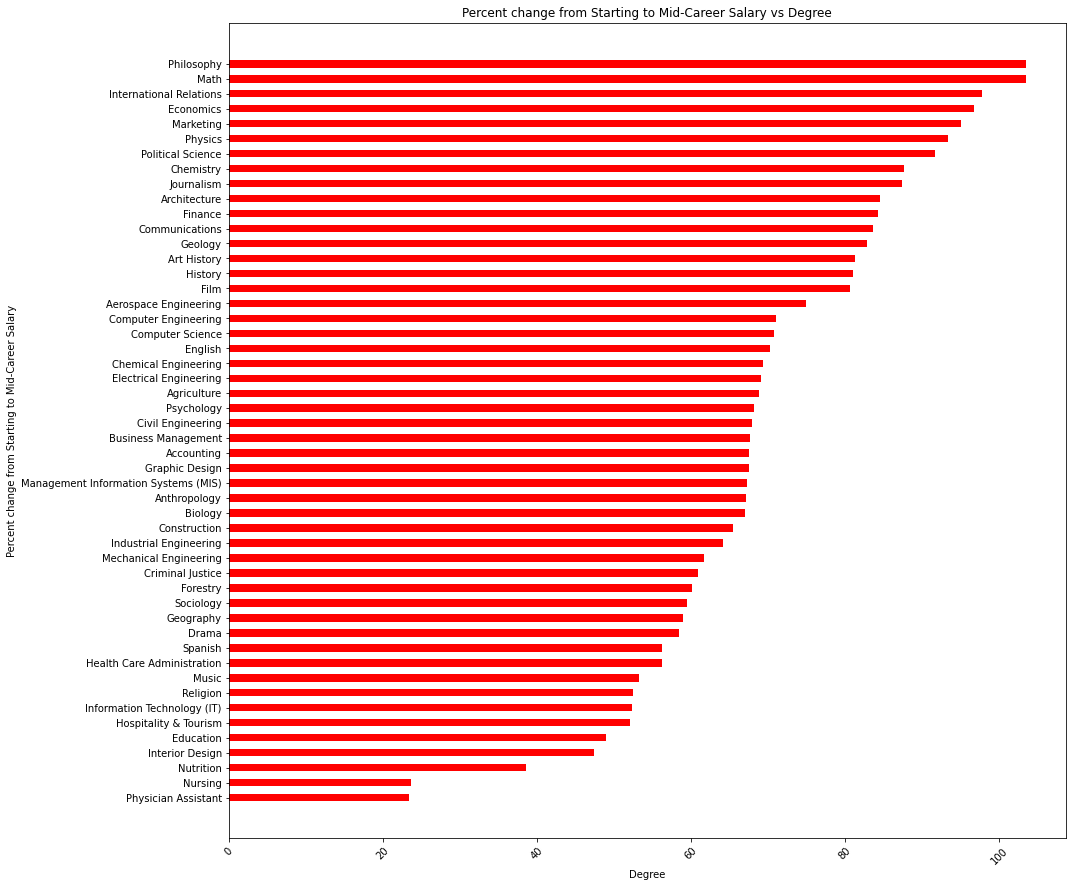

In [13]:
degrees = deg_pay['Undergraduate Major'].tolist()

percent_change_salary = deg_pay['Percent change from Starting to Mid-Career Salary'].tolist()


# Let's sort the degrees and percent_change_salary data so that they are
# both sorted according to the percent_change_salary data..
indices = [i[0] for i in sorted(enumerate(percent_change_salary), key=lambda x:x[1])]
percent_change_salary = [percent_change_salary[i] for i in indices]
degrees = [degrees[i] for i in indices]

plot_bar(degrees, percent_change_salary, title="Percent change from Starting to Mid-Career Salary vs Degree", xlabel = "Degree", ylabel = "Percent change from Starting to Mid-Career Salary", figsize=(15,15))

Huh!

* Looks like Physician Assistant and Nursing salaries don't change much from starting to mid career salary.
* Engineering, Computer Science and certain other fields are in the middle. They start off with a high starting salary and have a decent growth. But they don't increase at the highest rate.
* Suprisingly, Philosophy tops as the field with the greatest increase in income from starting to mid-career salaries. Math is a close second. Not sure what causes the increase? One wonders whether philosophy, math majors, economics are able to shift between fields. 

In [14]:
col_pay.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [17]:
#len(col_pay['School Name'].unique())

249

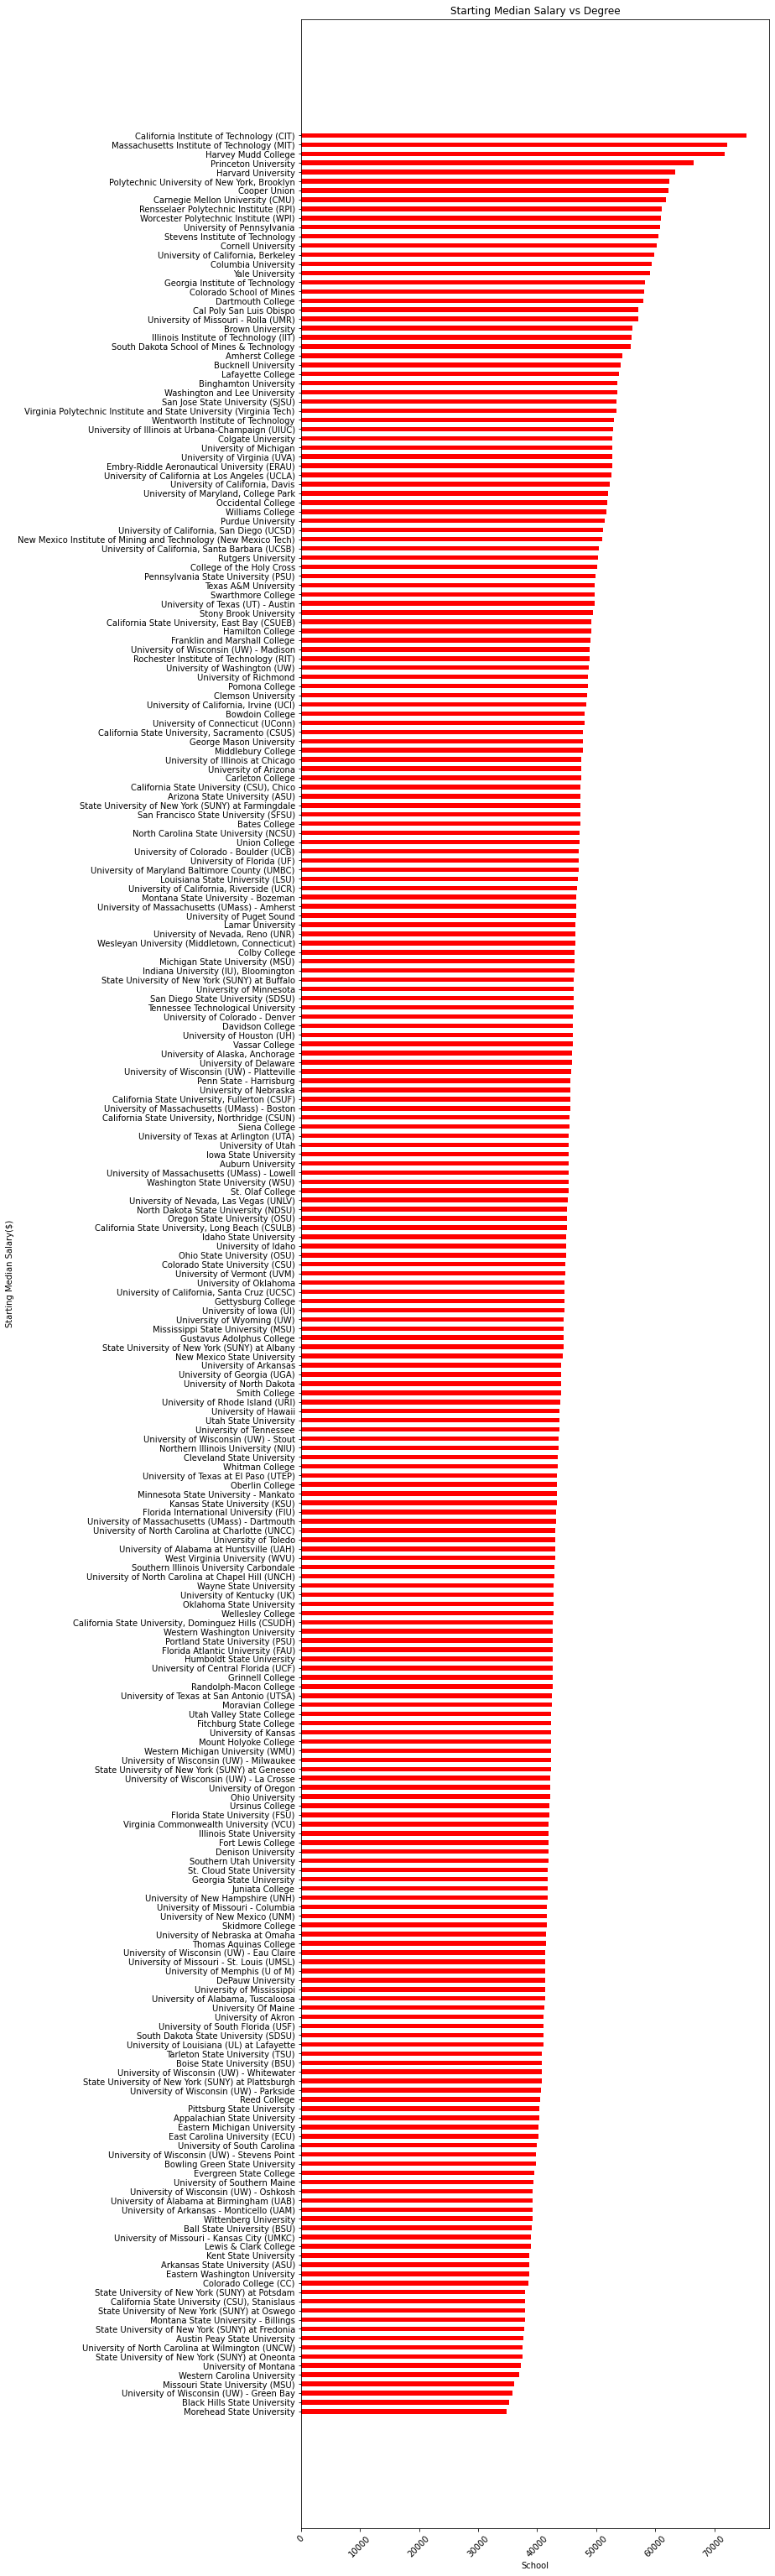

In [26]:
import re
schools = col_pay['School Name'].tolist()

starting_median_salary = col_pay['Starting Median Salary'].tolist()

# The price data is a string format. We want to convert it to int,
# so we remove $ and , from string. Then convert to float and then to int
# to truncate the decimal.
for i in range(len(starting_median_salary)):
  starting_median_salary[i] = re.sub(r'[\$,]',r'',starting_median_salary[i])
  starting_median_salary[i] = int(float(starting_median_salary[i]))

# Let's sort the degrees and starting_median_salary data so that they are
# both sorted according to the starting_median_salary data..
indices = [i[0] for i in sorted(enumerate(starting_median_salary), key=lambda x:x[1])]
starting_median_salary = [starting_median_salary[i] for i in indices]
schools = [schools[i] for i in indices]

plot_bar(schools, starting_median_salary, title="Starting Median Salary vs Degree", xlabel = "School", ylabel = "Starting Median Salary($)", figsize=(10,55))

It is not surprising to find the popular (and wealthy) private colleges have the highest earning start salaries. The only exception that is a public university is *University of California - Berkeley*.

There is not a whole lot of information in the datasets that can tell me WHY certain colleges have a higher salary versus lower salary. It could be private vs public, socio-economic factors of the area, socio-economic factors of its students, funding from govt or alumni, etc. 

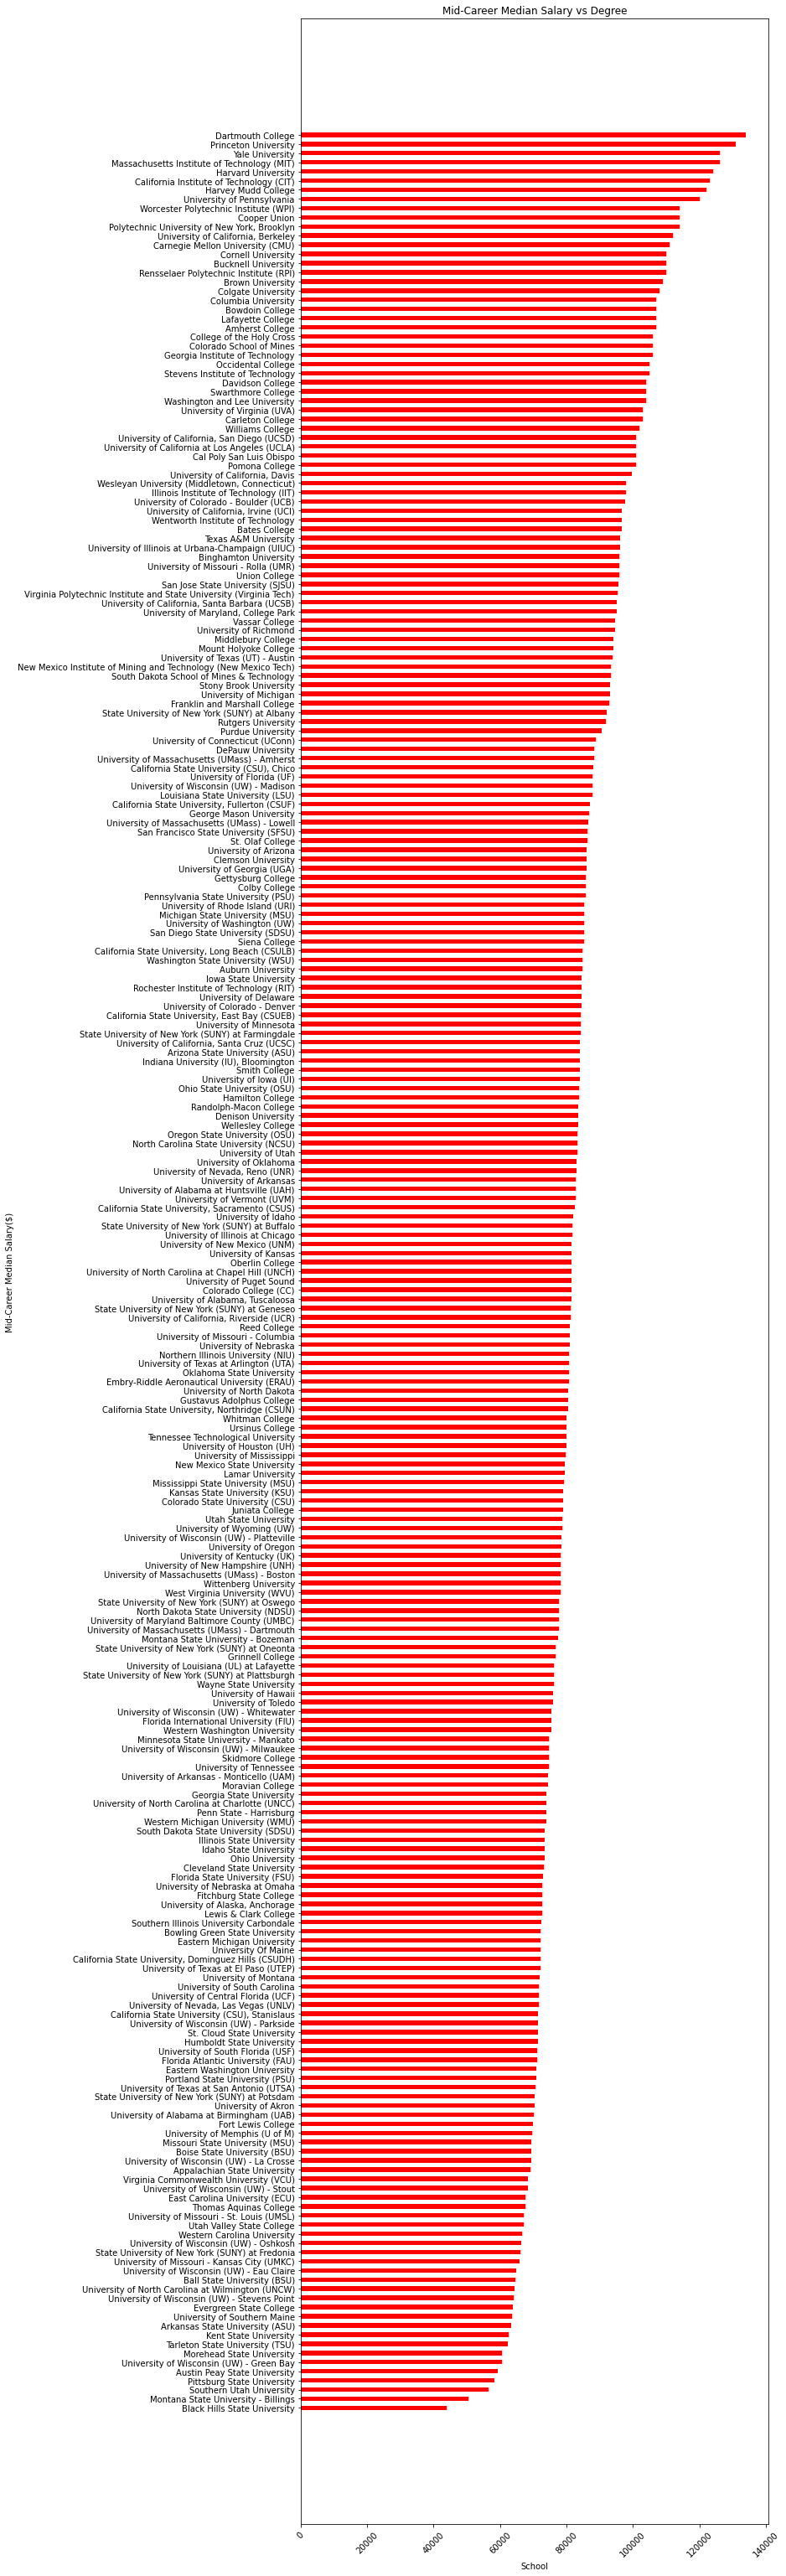

In [27]:
import re
schools = col_pay['School Name'].tolist()

midcareer_median_salary = col_pay['Mid-Career Median Salary'].tolist()

# The price data is a string format. We want to convert it to int,
# so we remove $ and , from string. Then convert to float and then to int
# to truncate the decimal.
for i in range(len(midcareer_median_salary)):
  midcareer_median_salary[i] = re.sub(r'[\$,]',r'',midcareer_median_salary[i])
  midcareer_median_salary[i] = int(float(midcareer_median_salary[i]))

# Let's sort the degrees and midcareer_median_salary data so that they are
# both sorted according to the midcareer_median_salary data..
indices = [i[0] for i in sorted(enumerate(midcareer_median_salary), key=lambda x:x[1])]
midcareer_median_salary = [midcareer_median_salary[i] for i in indices]
schools = [schools[i] for i in indices]

plot_bar(schools, midcareer_median_salary, title="Mid-Career Median Salary vs Degree", xlabel = "School", ylabel = "Mid-Career Median Salary($)", figsize=(10,55))

## THE END